In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_excel('dataset_new.xlsx',sheet_name='train')
data

,KodeBarang,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,cluster
0,04121,7,9,6,9,40,0,3,0,7,...,67,77,11,57,43,50,37,21,136,0
1,18031,230,227,279,153,190,256,267,305,238,...,336,153,103,221,360,280,240,120,548,1
2,04161,102,50,45,41,71,11,52,14,66,...,21,20,7,33,21,28,30,10,18,0
3,04162,272,155,214,226,268,110,204,253,193,...,102,118,120,211,292,105,108,101,117,1
4,04163,28,28,29,52,44,21,47,15,24,...,18,23,22,16,22,31,36,17,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,04157,55,64,44,61,30,1,24,37,67,...,20,10,300,34,7,7,6,4,21,0
102,18104,46,295,83,112,70,40,18,140,97,...,47,54,27,15,57,132,66,34,146,0
103,18106,200,204,0,2,10,7,0,27,74,...,15,136,15,15,14,131,84,12,14,0
104,18092,297,418,329,70,498,59,298,376,259,...,450,498,254,260,336,493,438,408,322,1


In [3]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [4]:
len(data['cluster'].unique())

4

In [5]:
#now lets take clusters
c0 = data.query("cluster == 0")
print("Jumlah Produk:")
print(c0['KodeBarang'].size)
c1 = data.query("cluster == 1")
print("Jumlah Produk:")
print(c1['KodeBarang'].size)
c2 = data.query("cluster == 2")
print("Jumlah Produk:")
print(c2['KodeBarang'].size)
c3 = data.query("cluster == 3")
print("Jumlah Produk:")
print(c3['KodeBarang'].size)

Jumlah Produk:
70
Jumlah Produk:
31
Jumlah Produk:
4
Jumlah Produk:
1


In [6]:
#oke ada ternyata yang cuman sendirian (1 product di cluster tersebut), kita beresin dia dulu, the easiest, dan biar keliatan kita
#ngapain aja di time series ini
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)
# ini fungsinya buat nge ubah dataset jadi windowed

# C3

In [7]:
#next kita ubah bentuk data nya dari yang tadinya kesamping jadi ke bawah, tapi pertama mau aku drop dulu cluster sama kode produknya
c3=c3.drop(columns=['KodeBarang','cluster'])
c3

,1,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,54
38,497,725,1233,1145,149,422,341,893,655,1022,...,0,0,-5,0,0,-5,0,0,0,0


In [8]:
#next, buat dia kayak mejeneng time series seperti biasanya, which is datanya ke bawah, 
new_c3=[]
time=[]
for idx,_ in enumerate(c3):
    new_c3.append(c3.iloc[0,idx])
    time.append(idx)
print(time,new_c3)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53] [497, 725, 1233, 1145, 149, 422, 341, 893, 655, 1022, 851, 758, 933, 1928, 912, 1106, 452, 151, 18079, 714, 617, 843, 436, 769, 1264, 1049, 1317, 962, 1008, 394, 659, 1046, 213, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -5, 0, 0, -5, 0, 0, 0, 0]


In [9]:
#normalisasi, karena gap nya ada yang sampe ribuan, biar lebih gampang tugas ann nya
series=new_c3
min = np.min(series)
max = np.max(series)
series = series - min
series = series / (max-min)

# scaler = MinMaxScaler(feature_range=(0, 1))
# series = scaler.fit_transform(series)

time = np.array(time)

In [10]:
series

array([2.77593453e-02, 4.03671754e-02, 6.84583057e-02, 6.35921256e-02,
       8.51581509e-03, 2.36120327e-02, 1.91329352e-02, 4.96571555e-02,
       3.64963504e-02, 5.67905331e-02, 4.73346605e-02, 4.21919929e-02,
       5.18690555e-02, 1.06890069e-01, 5.07078080e-02, 6.14355231e-02,
       2.52709578e-02, 8.62641009e-03, 1.00000000e+00, 3.97589029e-02,
       3.43950453e-02, 4.68922805e-02, 2.43861977e-02, 4.28002654e-02,
       7.01725282e-02, 5.82835656e-02, 7.31032957e-02, 5.34726830e-02,
       5.60163681e-02, 2.20637027e-02, 3.67175404e-02, 5.81176731e-02,
       1.20548551e-02, 2.76487503e-04, 2.76487503e-04, 3.87082504e-04,
       2.76487503e-04, 2.76487503e-04, 2.76487503e-04, 2.76487503e-04,
       2.76487503e-04, 2.76487503e-04, 2.76487503e-04, 2.76487503e-04,
       2.76487503e-04, 2.76487503e-04, 0.00000000e+00, 2.76487503e-04,
       2.76487503e-04, 0.00000000e+00, 2.76487503e-04, 2.76487503e-04,
       2.76487503e-04, 2.76487503e-04])

In [11]:
split_time = 3 # ini berapa bulan terkahir yang mau di potong buat pengujian?

time_train = time[:-split_time]
x_train =  series[:-split_time]
time_valid =  time[-split_time:]
x_valid =  series[-split_time:]

In [12]:
x_valid

array([0.00027649, 0.00027649, 0.00027649])

In [13]:
#buat data biar dibagi per window, jadi me masang masangkan waktu dan value,
window_size = 2
batch_size = 2
shuffle_buffer_size = 10

train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
valid_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

In [14]:
train_set

<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>

In [15]:
valid_set

<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>

In [16]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(2, input_shape=[None, 1]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(l1=0.01)),
        tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='relu')
    ])

    #the blstm part

In [17]:
#Using mae and mse
#model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),metrics=['mae'],loss='mse')
model.compile(optimizer=tf.keras.optimizers.Adam(),metrics=['mae'],loss='mse')
model.summary()
hist=model.fit(train_set,epochs=150,validation_data=valid_set, batch_size=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 2)           4         
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        34304     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1024)              66560     
                                                                 
 dropout (Dropout)           (None, 1024)              0

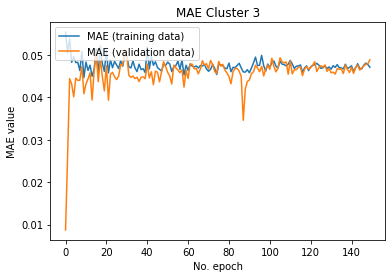

In [18]:
import matplotlib.pyplot as plt

plt.plot(hist.history['mae'], label='MAE (training data)')
plt.plot(hist.history['val_mae'], label='MAE (validation data)')

plt.title('MAE Cluster 3')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

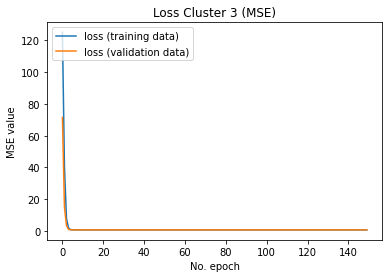

In [19]:
plt.plot(hist.history['loss'], label='loss (training data)')
plt.plot(hist.history['val_loss'], label='loss (validation data)')

plt.title("Loss Cluster 3 (MSE)")
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [20]:
prediksi=model.predict(valid_set)
prediksi

array([[0.04910354]], dtype=float32)

In [21]:
prediksi=prediksi.flatten()

In [22]:
hasil=np.concatenate((series[:-split_time],prediksi))

In [23]:
hasil

array([2.77593453e-02, 4.03671754e-02, 6.84583057e-02, 6.35921256e-02,
       8.51581509e-03, 2.36120327e-02, 1.91329352e-02, 4.96571555e-02,
       3.64963504e-02, 5.67905331e-02, 4.73346605e-02, 4.21919929e-02,
       5.18690555e-02, 1.06890069e-01, 5.07078080e-02, 6.14355231e-02,
       2.52709578e-02, 8.62641009e-03, 1.00000000e+00, 3.97589029e-02,
       3.43950453e-02, 4.68922805e-02, 2.43861977e-02, 4.28002654e-02,
       7.01725282e-02, 5.82835656e-02, 7.31032957e-02, 5.34726830e-02,
       5.60163681e-02, 2.20637027e-02, 3.67175404e-02, 5.81176731e-02,
       1.20548551e-02, 2.76487503e-04, 2.76487503e-04, 3.87082504e-04,
       2.76487503e-04, 2.76487503e-04, 2.76487503e-04, 2.76487503e-04,
       2.76487503e-04, 2.76487503e-04, 2.76487503e-04, 2.76487503e-04,
       2.76487503e-04, 2.76487503e-04, 0.00000000e+00, 2.76487503e-04,
       2.76487503e-04, 0.00000000e+00, 2.76487503e-04, 4.91035432e-02])

[]

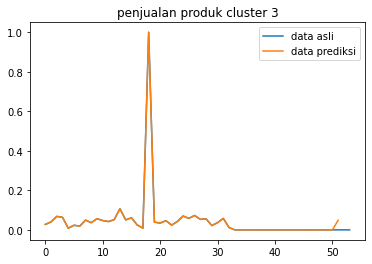

In [24]:
plt.plot(series,label='data asli')
plt.plot(hasil,label='data prediksi')
plt.title('penjualan produk cluster 3')
plt.legend()
plt.plot()

In [25]:
model.save('cluster3_newdata.h5')

# C2

In [27]:
#next kita ubah bentuk data nya dari yang tadinya kesamping jadi ke bawah, tapi pertama mau aku drop dulu cluster sama kode produknya
c2=c2.drop(columns=['KodeBarang','cluster'])
c2

,1,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,54
17,5307,3231,4562,372,4159,1853,6741,2884,5721,2573,...,2184,3210,2794,1243,2619,3888,1659,1971,2877,2138
30,3027,2097,6983,1318,2965,840,3094,1826,3463,5040,...,792,620,1265,910,713,867,630,860,758,747
48,2934,1481,1946,2130,2152,1563,1975,2426,1844,1944,...,1717,1858,1922,1731,2472,1846,2291,2199,1849,2180
82,0,33,2,0,3,27,23,9,7,-2,...,5597,2573,5687,5273,3236,8910,4665,7150,6726,5124


In [28]:
#next, buat dia kayak mejeneng time series seperti biasanya, which is datanya ke bawah, tapi di average per tanggal 
new_c2=[]
time=[]
for idx,a in enumerate(c2):
    new_c2.append(c2[a].mean())
    time.append(idx)


In [29]:
new_c2

[2817.0,
 1710.5,
 3373.25,
 955.0,
 2319.75,
 1070.75,
 2958.25,
 1786.25,
 2758.75,
 2388.75,
 2227.5,
 1751.75,
 3112.0,
 931.75,
 2626.5,
 2518.75,
 1584.25,
 2140.5,
 2179.75,
 1448.25,
 2123.0,
 1413.75,
 1921.0,
 1041.5,
 1660.5,
 2352.5,
 1685.75,
 1586.75,
 1766.5,
 2096.5,
 1461.0,
 1571.5,
 1316.25,
 1488.25,
 1714.0,
 915.5,
 1929.0,
 1736.0,
 1836.25,
 1776.25,
 1141.75,
 1651.0,
 1844.5,
 1842.0,
 2572.5,
 2065.25,
 2917.0,
 2289.25,
 2260.0,
 3877.75,
 2311.25,
 3045.0,
 3052.5,
 2547.25]

In [30]:
#normalisasi, karena gap nya ada yang sampe ribuan, biar lebih gampang tugas ann nya
series=new_c2
min = np.min(series)
max = np.max(series)
series = series - min
series = series / (max-min)
time = np.array(time)

In [31]:
series

array([0.64191071, 0.26837708, 0.82969027, 0.01333446, 0.47404844,
       0.05240949, 0.68959406, 0.29394886, 0.6222466 , 0.49734155,
       0.44290657, 0.2823023 , 0.74149717, 0.00548569, 0.57760149,
       0.54122711, 0.22575745, 0.41353701, 0.42678707, 0.1798464 ,
       0.40762934, 0.16819985, 0.33943793, 0.04253524, 0.25149802,
       0.48510423, 0.26002194, 0.2266014 , 0.28728163, 0.39868343,
       0.18415056, 0.22145329, 0.13528568, 0.19334965, 0.26955861,
       0.        , 0.34213858, 0.2769854 , 0.31082792, 0.29057304,
       0.07637775, 0.248291  , 0.31361296, 0.31276901, 0.5593721 ,
       0.38813402, 0.67566883, 0.46375222, 0.45387796, 1.        ,
       0.471179  , 0.71887923, 0.72141109, 0.55084817])

In [32]:
split_time = 3 # ini berapa bulan terkahir yang mau di potong buat pengujian?

time_train = time[:-split_time]
x_train =  series[:-split_time]
time_valid =  time[-split_time:]
x_valid =  series[-split_time:]

In [33]:
x_valid

array([0.71887923, 0.72141109, 0.55084817])

In [34]:
#buat data biar dibagi per window, jadi me masang masangkan waktu dan value,
window_size = 2
batch_size = 2
shuffle_buffer_size = 10

train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
valid_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

In [35]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(2, input_shape=[None, 1]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(l1=0.01)),
        tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='relu')
    ])

    #the blstm part

In [36]:
#Using mae and mse
model.compile(optimizer=tf.keras.optimizers.Adam(),metrics=['mae'],loss='mse')
model.summary()
hist=model.fit(valid_set,epochs=150,validation_data=train_set)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, None, 2)           4         
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 128)        34304     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1024)              66560     
                                                                 
 dropout_2 (Dropout)         (None, 1024)             

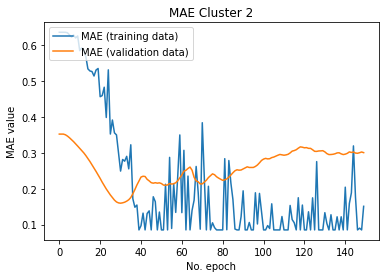

In [37]:
import matplotlib.pyplot as plt
plt.plot(hist.history['mae'], label='MAE (training data)')
plt.plot(hist.history['val_mae'], label='MAE (validation data)')

plt.title("MAE Cluster 2")
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

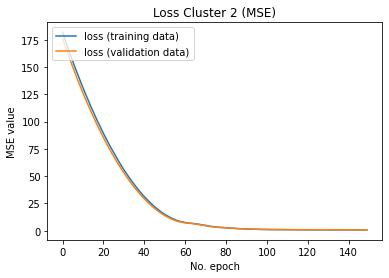

In [38]:
plt.plot(hist.history['loss'], label='loss (training data)')
plt.plot(hist.history['val_loss'], label='loss (validation data)')

plt.title("Loss Cluster 2 (MSE)")
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [39]:
prediksi=model.predict(valid_set)
prediksi

array([[0.61825013]], dtype=float32)

In [40]:
prediksi=prediksi.flatten()

In [41]:
hasil=np.concatenate((series[:-split_time],prediksi))

In [42]:
hasil

array([0.64191071, 0.26837708, 0.82969027, 0.01333446, 0.47404844,
       0.05240949, 0.68959406, 0.29394886, 0.6222466 , 0.49734155,
       0.44290657, 0.2823023 , 0.74149717, 0.00548569, 0.57760149,
       0.54122711, 0.22575745, 0.41353701, 0.42678707, 0.1798464 ,
       0.40762934, 0.16819985, 0.33943793, 0.04253524, 0.25149802,
       0.48510423, 0.26002194, 0.2266014 , 0.28728163, 0.39868343,
       0.18415056, 0.22145329, 0.13528568, 0.19334965, 0.26955861,
       0.        , 0.34213858, 0.2769854 , 0.31082792, 0.29057304,
       0.07637775, 0.248291  , 0.31361296, 0.31276901, 0.5593721 ,
       0.38813402, 0.67566883, 0.46375222, 0.45387796, 1.        ,
       0.471179  , 0.61825013])

[]

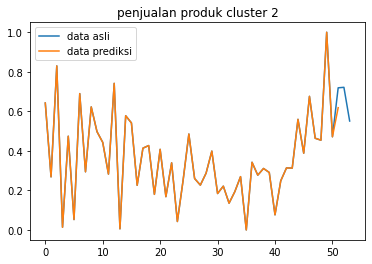

In [43]:
plt.plot(series,label='data asli')
plt.plot(hasil,label='data prediksi')
plt.title('penjualan produk cluster 2')
plt.legend()
plt.plot()

In [44]:
model.save('cluster2_newdata.h5')

# C1

In [45]:
#next kita ubah bentuk data nya dari yang tadinya kesamping jadi ke bawah, tapi pertama mau aku drop dulu cluster sama kode produknya
c1=c1.drop(columns=['KodeBarang','cluster'])
c1

,1,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,54
1,230,227,279,153,190,256,267,305,238,519,...,85,336,153,103,221,360,280,240,120,548
3,272,155,214,226,268,110,204,253,193,217,...,112,102,118,120,211,292,105,108,101,117
5,71,100,97,147,153,100,194,93,140,131,...,92,94,116,73,154,52,78,119,75,88
7,362,314,340,278,224,305,293,178,770,570,...,394,174,266,395,392,300,411,519,422,379
19,380,677,745,395,476,298,214,311,320,422,...,23,17,26,92,28,0,0,0,0,0
20,22,99,70,77,135,328,10,76,30,16,...,380,91,217,19,227,31,32,226,33,207
24,112,141,35,39,145,15,57,63,45,90,...,626,1294,30,966,384,1017,1270,623,511,47
29,0,300,0,314,298,0,275,240,301,747,...,500,100,0,0,0,0,0,0,0,24
31,1,2,5,7,7,2,3,1,11,-2,...,164,232,307,170,240,110,232,407,265,513
32,153,112,131,128,167,97,176,191,0,324,...,104,131,86,122,161,63,90,131,108,122


In [46]:
#next, buat dia kayak mejeneng time series seperti biasanya, which is datanya ke bawah, tapi di average per tanggal 
new_c1=[]
time=[]
for idx,a in enumerate(c1):
    new_c1.append(c1[a].mean())
    time.append(idx)


In [47]:
new_c1

[249.80645161290323,
 236.09677419354838,
 374.5483870967742,
 248.32258064516128,
 313.61290322580646,
 240.83870967741936,
 290.35483870967744,
 254.41935483870967,
 291.5806451612903,
 360.38709677419354,
 281.2903225806452,
 187.7741935483871,
 290.35483870967744,
 296.51612903225805,
 258.80645161290323,
 276.2903225806452,
 294.8709677419355,
 290.0967741935484,
 296.6774193548387,
 218.41935483870967,
 283.2258064516129,
 267.4193548387097,
 201.51612903225808,
 199.38709677419354,
 293.64516129032256,
 338.80645161290323,
 292.741935483871,
 288.7741935483871,
 349.258064516129,
 240.03225806451613,
 305.5483870967742,
 297.61290322580646,
 308.2903225806452,
 291.4516129032258,
 341.1290322580645,
 274.9032258064516,
 350.3225806451613,
 298.2903225806452,
 394.6774193548387,
 232.16129032258064,
 193.70967741935485,
 181.96774193548387,
 242.70967741935485,
 239.4516129032258,
 293.0,
 304.7741935483871,
 281.38709677419354,
 278.0967741935484,
 311.96774193548384,
 306.29032

In [48]:
#normalisasi, karena gap nya ada yang sampe ribuan, biar lebih gampang tugas ann nya
series=new_c1
min = np.min(series)
max = np.max(series)
series = series - min
series = series / (max-min)
time = np.array(time)

In [49]:
series

array([0.29515789, 0.23550877, 0.83789474, 0.28870175, 0.57277193,
       0.25614035, 0.47157895, 0.31522807, 0.47691228, 0.7762807 ,
       0.43214035, 0.02526316, 0.47157895, 0.49838596, 0.33431579,
       0.41038596, 0.49122807, 0.47045614, 0.49908772, 0.15859649,
       0.4405614 , 0.37178947, 0.08505263, 0.07578947, 0.48589474,
       0.68238596, 0.48196491, 0.46470175, 0.72785965, 0.25263158,
       0.53768421, 0.50315789, 0.54961404, 0.47635088, 0.69249123,
       0.40435088, 0.73249123, 0.50610526, 0.92547368, 0.21838596,
       0.05108772, 0.        , 0.2642807 , 0.25010526, 0.48308772,
       0.53431579, 0.4325614 , 0.41824561, 0.56561404, 0.54091228,
       0.84659649, 0.75621053, 0.48280702, 1.        ])

In [50]:
split_time = 3 # ini berapa bulan terkahir yang mau di potong buat pengujian?

time_train = time[:-split_time]
x_train =  series[:-split_time]
time_valid =  time[-split_time:]
x_valid =  series[-split_time:]

In [51]:
x_valid

array([0.75621053, 0.48280702, 1.        ])

In [52]:
#buat data biar dibagi per window, jadi me masang masangkan waktu dan value,
window_size = 2
batch_size = 2
shuffle_buffer_size = 10

train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
valid_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

In [53]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(2, input_shape=[None, 1]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(l1=0.01)),
        tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='relu')
    ])

    #the blstm part

In [54]:
#Using mae and mse
model.compile(optimizer=tf.keras.optimizers.Adam(),metrics=['mae'],loss='mse')
model.summary()
hist=model.fit(valid_set,epochs=150,validation_data=train_set)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, None, 2)           4         
                                                                 
 bidirectional_4 (Bidirectio  (None, None, 128)        34304     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 1024)              66560     
                                                                 
 dropout_4 (Dropout)         (None, 1024)             

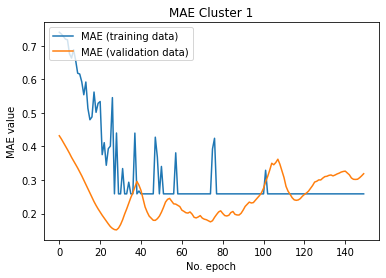

In [55]:
import matplotlib.pyplot as plt
plt.plot(hist.history['mae'], label='MAE (training data)')
plt.plot(hist.history['val_mae'], label='MAE (validation data)')

plt.title("MAE Cluster 1")
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

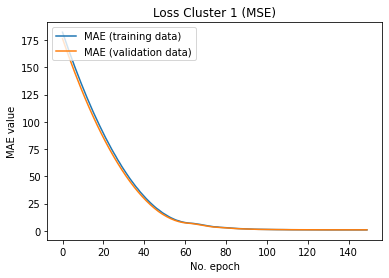

In [57]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label='MAE (training data)')
plt.plot(hist.history['val_loss'], label='MAE (validation data)')

plt.title("Loss Cluster 1 (MSE)")
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [58]:
prediksi=model.predict(valid_set)
prediksi

array([[0.7421838]], dtype=float32)

In [59]:
prediksi=prediksi.flatten()

In [60]:
hasil=np.concatenate((series[:-split_time],prediksi))

In [61]:
hasil

array([0.29515789, 0.23550877, 0.83789474, 0.28870175, 0.57277193,
       0.25614035, 0.47157895, 0.31522807, 0.47691228, 0.7762807 ,
       0.43214035, 0.02526316, 0.47157895, 0.49838596, 0.33431579,
       0.41038596, 0.49122807, 0.47045614, 0.49908772, 0.15859649,
       0.4405614 , 0.37178947, 0.08505263, 0.07578947, 0.48589474,
       0.68238596, 0.48196491, 0.46470175, 0.72785965, 0.25263158,
       0.53768421, 0.50315789, 0.54961404, 0.47635088, 0.69249123,
       0.40435088, 0.73249123, 0.50610526, 0.92547368, 0.21838596,
       0.05108772, 0.        , 0.2642807 , 0.25010526, 0.48308772,
       0.53431579, 0.4325614 , 0.41824561, 0.56561404, 0.54091228,
       0.84659649, 0.7421838 ])

[]

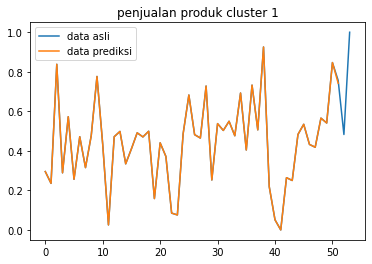

In [62]:
plt.plot(series,label='data asli')
plt.plot(hasil,label='data prediksi')
plt.title('penjualan produk cluster 1')
plt.legend()
plt.plot()

In [63]:
model.save('cluster1_newdata.h5')

# C0

In [64]:
#next kita ubah bentuk data nya dari yang tadinya kesamping jadi ke bawah, tapi pertama mau aku drop dulu cluster sama kode produknya
c0=c0.drop(columns=['KodeBarang','cluster'])
c0

,1,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,54
0,7,9,6,9,40,0,3,0,7,2,...,62,67,77,11,57,43,50,37,21,136
2,102,50,45,41,71,11,52,14,66,76,...,23,21,20,7,33,21,28,30,10,18
4,28,28,29,52,44,21,47,15,24,32,...,18,18,23,22,16,22,31,36,17,14
6,40,11,40,50,43,0,1,31,0,6,...,2,11,0,2,0,0,4,0,0,0
8,85,164,231,157,195,122,196,136,215,232,...,32,71,53,42,113,57,45,34,78,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,0,0,10,15,63,228,223,177,365,...,0,0,0,5,-5,15,0,0,0,0
100,260,47,289,189,73,2,360,-13,339,508,...,101,21,33,13,31,17,46,82,22,29
101,55,64,44,61,30,1,24,37,67,85,...,21,20,10,300,34,7,7,6,4,21
102,46,295,83,112,70,40,18,140,97,136,...,55,47,54,27,15,57,132,66,34,146


In [65]:
#next, buat dia kayak mejeneng time series seperti biasanya, which is datanya ke bawah, tapi di average per tanggal 
new_c0=[]
time=[]
for idx,a in enumerate(c2):
    new_c0.append(c0[a].mean())
    time.append(idx)


In [66]:
new_c0

[61.5,
 49.67142857142857,
 52.98571428571429,
 41.07142857142857,
 52.77142857142857,
 34.042857142857144,
 56.94285714285714,
 55.74285714285714,
 57.9,
 77.15714285714286,
 53.58571428571429,
 40.17142857142857,
 53.42857142857143,
 62.9,
 50.7,
 51.128571428571426,
 47.55714285714286,
 44.214285714285715,
 43.81428571428572,
 37.3,
 47.42857142857143,
 48.385714285714286,
 36.5,
 27.87142857142857,
 48.41428571428571,
 42.97142857142857,
 44.8,
 44.2,
 41.371428571428574,
 29.942857142857143,
 47.128571428571426,
 38.75714285714286,
 42.67142857142857,
 38.457142857142856,
 37.25714285714286,
 35.07142857142857,
 50.042857142857144,
 32.44285714285714,
 43.75714285714286,
 36.371428571428574,
 19.32857142857143,
 20.1,
 35.48571428571429,
 32.24285714285714,
 28.414285714285715,
 27.614285714285714,
 34.08571428571429,
 31.7,
 41.07142857142857,
 24.814285714285713,
 35.57142857142857,
 29.928571428571427,
 24.185714285714287,
 25.84285714285714]

In [68]:
#normalisasi, karena gap nya ada yang sampe ribuan, biar lebih gampang tugas ann nya
series=new_c0
min = np.min(series)
max = np.max(series)
series = series - min
series = series / (max-min)
time = np.array(time)

In [69]:
series

array([0.72924901, 0.52470356, 0.58201581, 0.37598814, 0.57831028,
       0.25444664, 0.65044466, 0.62969368, 0.66699605, 1.        ,
       0.5923913 , 0.3604249 , 0.58967391, 0.7534585 , 0.54249012,
       0.54990119, 0.48814229, 0.43033597, 0.42341897, 0.31077075,
       0.48591897, 0.50247036, 0.29693676, 0.14772727, 0.50296443,
       0.40884387, 0.44046443, 0.43008893, 0.38117589, 0.18354743,
       0.48073123, 0.33596838, 0.40365613, 0.33078063, 0.31002964,
       0.2722332 , 0.53112648, 0.22677866, 0.42243083, 0.29471344,
       0.        , 0.01333992, 0.27939723, 0.22332016, 0.15711462,
       0.14328063, 0.25518775, 0.21393281, 0.37598814, 0.09486166,
       0.28087945, 0.1833004 , 0.08399209, 0.11264822])

In [70]:
split_time = 3 # ini berapa bulan terkahir yang mau di potong buat pengujian?

time_train = time[:-split_time]
x_train =  series[:-split_time]
time_valid =  time[-split_time:]
x_valid =  series[-split_time:]

In [71]:
x_valid

array([0.1833004 , 0.08399209, 0.11264822])

In [72]:
#buat data biar dibagi per window, jadi me masang masangkan waktu dan value,
window_size = 2
batch_size = 2
shuffle_buffer_size = 10

train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
valid_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

In [73]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(2, input_shape=[None, 1]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(l1=0.01)),
        tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='relu')
    ])

    #the blstm part

In [74]:
#Using mae and mse
model.compile(optimizer=tf.keras.optimizers.Adam(),metrics=['mae'],loss='mse')
model.summary()
hist=model.fit(valid_set,epochs=150,validation_data=train_set)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, None, 2)           4         
                                                                 
 bidirectional_6 (Bidirectio  (None, None, 128)        34304     
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 1024)              66560     
                                                                 
 dropout_6 (Dropout)         (None, 1024)             

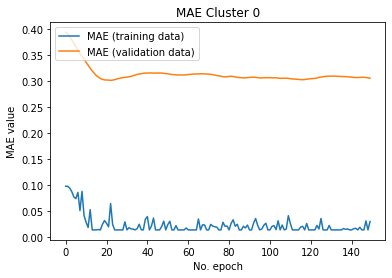

In [75]:
import matplotlib.pyplot as plt
plt.plot(hist.history['mae'], label='MAE (training data)')
plt.plot(hist.history['val_mae'], label='MAE (validation data)')

plt.title("MAE Cluster 0")
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

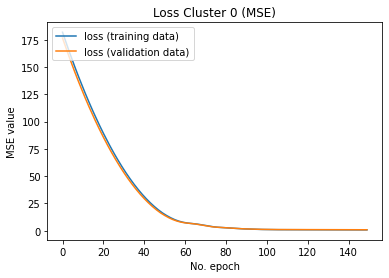

In [76]:
plt.plot(hist.history['loss'], label='loss (training data)')
plt.plot(hist.history['val_loss'], label='loss (validation data)')

plt.title("Loss Cluster 0 (MSE)")
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [77]:
prediksi=model.predict(valid_set)
prediksi

array([[0.09571666]], dtype=float32)

In [78]:
prediksi=prediksi.flatten()

In [79]:
hasil=np.concatenate((series[:-split_time],prediksi))

In [80]:
hasil

array([0.72924901, 0.52470356, 0.58201581, 0.37598814, 0.57831028,
       0.25444664, 0.65044466, 0.62969368, 0.66699605, 1.        ,
       0.5923913 , 0.3604249 , 0.58967391, 0.7534585 , 0.54249012,
       0.54990119, 0.48814229, 0.43033597, 0.42341897, 0.31077075,
       0.48591897, 0.50247036, 0.29693676, 0.14772727, 0.50296443,
       0.40884387, 0.44046443, 0.43008893, 0.38117589, 0.18354743,
       0.48073123, 0.33596838, 0.40365613, 0.33078063, 0.31002964,
       0.2722332 , 0.53112648, 0.22677866, 0.42243083, 0.29471344,
       0.        , 0.01333992, 0.27939723, 0.22332016, 0.15711462,
       0.14328063, 0.25518775, 0.21393281, 0.37598814, 0.09486166,
       0.28087945, 0.09571666])

[]

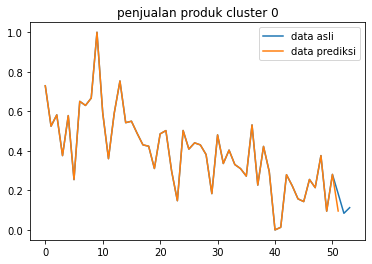

In [81]:
plt.plot(series,label='data asli')
plt.plot(hasil,label='data prediksi')
plt.title('penjualan produk cluster 0')
plt.legend()
plt.plot()

In [82]:
model.save('cluster0_newdata.h5')